In [11]:
from sklearn.datasets import load_iris
load_iris = load_iris()

In [12]:
load_iris.data.shape

(150, 4)

In [13]:
X=load_iris.data
y=load_iris.target

print('Data fields data set:')
print(load_iris.feature_names)

print('\nClassification outcomes:')
print(load_iris.target_names)

Data fields data set:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classification outcomes:
['setosa' 'versicolor' 'virginica']


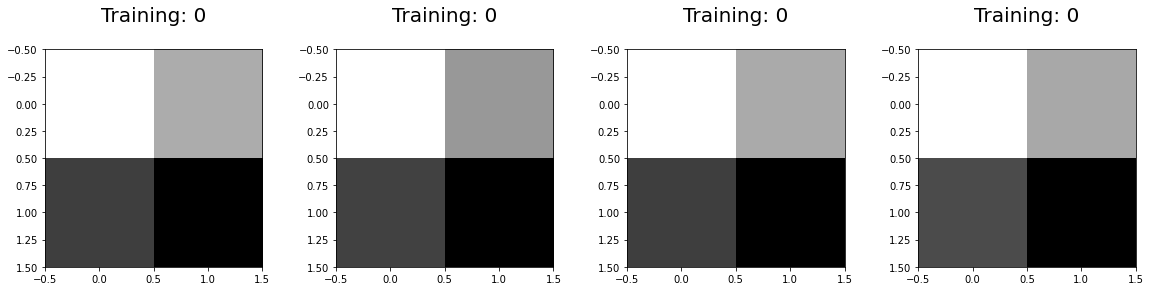

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(load_iris.data[0:5], load_iris.target[0:4])):
 plt.subplot(1, 4, index + 1)
 plt.imshow(np.reshape(image, (2,2)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.predict(X_test[:])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [23]:
y_prediction = lr.predict(X_test)

In [24]:
correct = (y_test == y_prediction).sum()
incorrect = (y_test != y_prediction).sum()
accuracy = correct / (correct + incorrect) * 100

print('\nPercent Accuracy: %0.1f' %accuracy)


Percent Accuracy: 97.4


In [26]:
import pandas as pd
prediction = pd.DataFrame()
prediction['actual'] = load_iris.target_names[y_test]
prediction['predicted'] = load_iris.target_names[y_prediction]
prediction['correct'] = prediction['actual'] == prediction['predicted']

print('\nDetailed results for first 20 tests:')
print(prediction.head(20))

df_new = prediction[prediction['correct'] == False]

print(df_new)


Detailed results for first 20 tests:
        actual   predicted  correct
0    virginica   virginica     True
1   versicolor  versicolor     True
2       setosa      setosa     True
3    virginica   virginica     True
4       setosa      setosa     True
5    virginica   virginica     True
6       setosa      setosa     True
7   versicolor  versicolor     True
8   versicolor  versicolor     True
9   versicolor  versicolor     True
10   virginica   virginica     True
11  versicolor  versicolor     True
12  versicolor  versicolor     True
13  versicolor  versicolor     True
14  versicolor  versicolor     True
15      setosa      setosa     True
16  versicolor  versicolor     True
17  versicolor  versicolor     True
18      setosa      setosa     True
19      setosa      setosa     True
        actual  predicted  correct
37  versicolor  virginica    False


In [27]:
df_new.shape

(1, 3)

In [28]:
score = lr.score(X_test, y_test)
print(score)

0.9736842105263158


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [30]:
cm = metrics.confusion_matrix(y_test, y_prediction)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


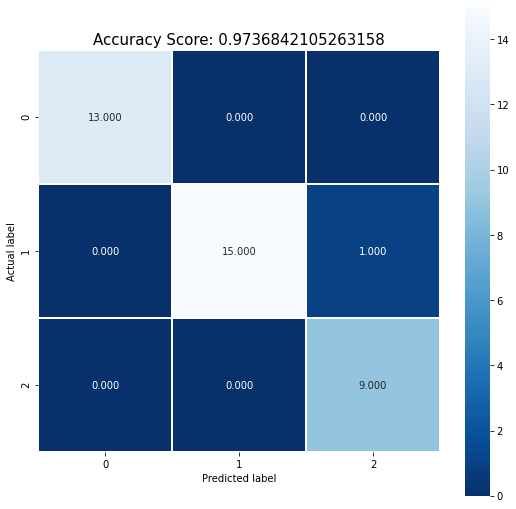

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);